### Cleaning Dirty Data

In [392]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [420]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [421]:
#to overcome the unicode that cant be converted we used unicode escapeunder encoding
apc_data = pd.read_csv('apcspend.csv', encoding='unicode_escape')

In [422]:
apc_data.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [423]:
apc_data.tail()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
2122,2901593,Wolters Kluwer Health,Circulation Research,Mechanistic Links Between Na+ Channel (SCN5A) ...,£1334.15
2123,3748854,Wolters Kluwer Health,AIDS,Evaluation of an empiric risk screening score ...,£1834.77
2124,3785148,Wolters Kluwer Health,Pediatr Infect Dis J,Topical umbilical cord care for prevention of ...,£1834.77
2125,PMCID:\n PMC3647051\n,Wolters Kluwer N.V./Lippinott,AIDS,Grassroots Community Organisations' Contributi...,£2374.52
2126,PMID: 23846567 (Epub July 2013),Wolters Kluwers,Journal of Acquired Immune Deficiency Syndromes,A novel community health worker tool outperfor...,£2034.75


In [424]:
apc_data.columns

Index(['PMID/PMCID', 'Publisher', 'Journal title', 'Article title',
       'COST (£) charged to Wellcome (inc VAT when charged)'],
      dtype='object')

In [425]:
apc_data = apc_data.rename(columns = {'PMID/PMCID':'pmid_pmcid', 'Publisher':'publisher', 'Journal title':'journal_title','Article title':'article_title', 'COST (£) charged to Wellcome (inc VAT when charged)':'cost'})

In [426]:
apc_data.head()

,pmid_pmcid,publisher,journal_title,article_title,cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [427]:
apc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
pmid_pmcid       1928 non-null object
publisher        2127 non-null object
journal_title    2126 non-null object
article_title    2127 non-null object
cost             2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


In [428]:
apc_data['pmid_pmcid']

0                                    NaN
1                             PMC3679557
2                  23043264  PMC3506128 
3                    23438330 PMC3646402
4                   23438216 PMC3601604 
5                             PMC3579457
6                             PMC3709265
7                   23057412 PMC3495574 
8                      PMCID: PMC3780468
9                      PMCID: PMC3621575
10                     PMCID: PMC3739413
11                     PMCID: PMC3530961
12                     PMCID: PMC3624797
13                            PMC3413243
14                            PMC3694353
15                            PMC3572711
16                              22610094
17                     PMCID: PMC3586974
18          23455506  PMCID: PMC3607399 
19            PMID: 24015914 PMC3833349 
20                         : PMC3805332 
21                                   NaN
22              PMCID:\n    PMC3656742\n
23                        PMCID: 3584654
24              

In [429]:
apc_data['pmid_pmcid'].unique()

array([nan, 'PMC3679557', '23043264  PMC3506128 ', ..., '3748854',
       '3785148', 'PMID: 23846567  (Epub July 2013)'], dtype=object)

In [430]:
apc_data.head()

,pmid_pmcid,publisher,journal_title,article_title,cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [431]:
#Turn the publisher column into capital letters
apc_data['publisher'] = apc_data['publisher'].str.upper()

In [432]:
# counts to know frequency
apc_data['publisher'].value_counts()

ELSEVIER                                                            391
PUBLIC LIBRARY OF SCIENCE                                           278
WILEY                                                               136
SPRINGER                                                             81
OXFORD UNIVERSITY PRESS                                              79
OUP                                                                  56
WILEY-BLACKWELL                                                      56
BIOMED CENTRAL                                                       51
NATURE PUBLISHING GROUP                                              47
ASBMB                                                                46
BMC                                                                  26
PLOS                                                                 24
NATURE                                                               24
FRONTIERS                                                       

In [433]:
#the unique shape of the publisher column
apc_data['publisher'].unique().shape

(275,)

In [434]:
#strip the data of all unnecessary spaces and new line charater
#apc_data.loc[:, 'publisher'].str.strip().unique().shape


In [435]:
#strip the data of all unnecessary spaces and new line charater and reed the publisher column off duplications and misspelling e.t.c
apc_data['publisher'] = apc_data['publisher']\
.str.replace('(^.*ACS.*$)', 'AMERICAN CHEMICAL SOCIETY')\
.str.replace('(^.*AMERICAN.SOCIETY.FOR.BIO.*$)','AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY')\
.str.replace('(^.*AMERICAN.SOC\s.*$)', 'AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY')\
.str.replace('(^.*AMERICAN\sSOCIETY\s(FOR|OF)\sMICROB.*$)', 'AMERICAN SOCIETY OF MICROBIOLOGY')\
.str.replace('\n', '')\
.str.strip()\
.str.replace('(^.*AMERICAN SOCIETY OF HA.*$)', 'AMERICAN SOCIETY OF HAEMATOLOGY')\
.str.replace('(^.*AMERICAN SOCIETY OF HE.*$)', 'AMERICAN SOCIETY OF HAEMATOLOGY')\
.str.replace('(^.*BMJ.*$)', 'BMJ GROUP')\
.str.replace('(^.*CADMUS.J.*$)', 'CADMUS JOURNAL SERVICES')\
.str.replace('(^.*CADMUS.*$)', 'CADMUS JOURNAL SERVICES')\
.str.replace('(^.*CAMDUS.*$)', 'CADMUS JOURNAL SERVICES')\
.str.replace('(^.*BIOMED.*$)', 'BIOMED CENTRAL LTD')\
.str.replace('(^.*BENTHA.*$)', 'BENTHAM SCIENCE PUBLISHERS')\
.str.replace('(^.*CAMBRIDGE.*$)', 'CAMBRIDGE UNIVERSITY PRESS')\
.str.replace('(^.*CENVEO.*$)', 'CENVEO PUBLISHER SERVICES')\
.str.replace('(^.*COLD SPRING.*$)', 'COLD SPRING HABOUR PRESS')\
.str.replace('(^.*COMPANY OF.*$)', 'COMPANY OF BIOLOGISTS')\
.str.replace('(^.*DARTMOUTH.*$)', 'DARTMOUTH JOURNAL SERVICES')\
.str.replace('(^.*DARMOUTH.*$)', 'DARTMOUTH JOURNAL SERVICES')\
.str.replace('(^.*ELSEV.*$)', 'ELSEVIER SCIENCE PUBLISHERS')\
.str.replace('(^.*FEDERATION OF AMERICAN.*$)', 'FASEB')\
.str.replace('(^.*FEDERATION OF THE AMERICAN.*$)', 'FASEB')\
.str.replace('(^.*FRONTIERS.*$)', 'FRONTIERS MEDIA')\
.str.replace('(^.*FUTURE.*$)', 'FUTURE MEDICINE')\
.str.replace('(^.*HINDAWI.*$)', 'HINDAWI PUBLISHING')\
.str.replace('(^.*IMPACT.*$)', 'IMPACT JOURNALS')\
.str.replace('(^.*INTERNATIONAL UNION OF CRY.*$)', 'INTERNATIONAL UNION OF CRYSTALLOGRAPHY')\
.str.replace('(^.*JOHN W.*$)', 'JOHN WILEY')\
.str.replace('(^.*LANDES.*$)', 'LANDES BIOSCIENCES')\
.str.replace('(^.*MARY ANN.*$)', 'MARY ANN LIEBERT')\
.str.replace('(^.*MIT PRESS.*$)', 'MIT PRESS')\
.str.replace('(^.*MY.*$)', 'MY JOVE CORPORATION')\
.str.replace('(^.*JOVE.*$)', 'MY JOVE CORPORATION')\
.str.replace('(^.*NATURE.*$)', 'NATURE PUBLISHING GROUP')\
.str.replace('(^.*NPG.*$)', 'NATURE PUBLISHING GROUP')\
.str.replace('(^.*OXFORD.*$)', 'OXFORD UNIVERSITY PRESS')\
.str.replace('(^.*OUP.*$)', 'OXFORD UNIVERSITY PRESS')\
.str.replace('(^.*PLOS.*$)', 'PLOS PUBLIC LIBRARY OF SCIENCE')\
.str.replace('(^.*PNAS.*$)', 'PNAS')\
.str.replace('(^.*PORTLAND.*$)', 'PORTLAND PRESS')\
.str.replace('(^.*PUBMED.*$)', 'PUBMED')\
.str.replace('(^.*ROYAL SOCIETY.*$)', 'ROYAL SOCIETY OF CHEMISTRY')\
.str.replace('(^.*RSC.*$)', 'ROYAL SOCIETY OF CHEMISTRY')\
.str.replace('(^.*SAGE.*$)', 'SAGE PUBLICATIONS')\
.str.replace('(^.*SOCIETY FOR GENE.*$)', 'SOCIETY FOR GENERAL MICROBIOLOGY')\
.str.replace('(^.*SOCIETY FOR LEUKO.*$)', 'SOCIETY OF LEUKOCYTE BIOLOGY')\
.str.replace('(^.*SOCIETY FOR NEURO.*$)', 'SOCIETY OF NEURO SCIENCES')\
.str.replace('(^.*SOCIETY OF NEUROSCIENCE.*$)', 'SOCIETY OF NEURO SCIENCES')\
.str.replace('(^.*SOCIETY OF GENE.*$)', 'SOCIETY FOR GENERAL MICROBIOLOGY')\
.str.replace('(^.*SPRINGER.*$)', 'SPRINGER')\
.str.replace('(^.*TAYLOR.*$)', 'TAYLOR AND FRANCIS')\
.str.replace('(^.*T&F.*$)', 'TAYLOR AND FRANCIS')\
.str.replace('(^.*THE ENDOCRINE SOC.*$)', 'THE ENDOCRINE SOCIETY')\
.str.replace('(^.*THE END.*$)', 'THE ENDOCRINE SOCIETY')\
.str.replace('(^.*WILEY.*$)', 'WILEY BLACKWELL')\
.str.replace('(^.*WLIEY.*$)', 'WILEY BLACKWELL')\
.str.replace('(^.*WOLTERS KLU.*$)', 'WOLTERS KLUWER')\
.str.replace('(^.*ASM.*$)', 'AMERICAN SOCIETY OF MICROBIOLOGY')\
.str.replace('(^.*ASBMB.*$)', 'AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY')\
.str.replace('(^.*AMBSB.*$)', 'AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY')\
.str.replace('(^.*CUP.*$)', 'CENVEO PUBLISHER SERVICES')



In [436]:
apc_data.head()

,pmid_pmcid,publisher,journal_title,article_title,cost
0,NaN,CENVEO PUBLISHER SERVICES,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,AMERICAN CHEMICAL SOCIETY,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,AMERICAN CHEMICAL SOCIETY,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,AMERICAN CHEMICAL SOCIETY,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,AMERICAN CHEMICAL SOCIETY,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [462]:
#clean the journal title column
apc_data['journal_title'].value_counts().head()

PLoS One                                           92
PLoS ONE                                           62
Journal of Biological Chemistry                    48
Nucleic Acids Research                             21
Proceedings of the National Academy of Sciences    19
Name: journal_title, dtype: int64

In [465]:
#count the row of journal title before cleaning
apc_data['journal_title'].unique().shape

(984,)

In [503]:
#clean the journal title column
apc_data['journal_title'] = apc_data['journal_title']\
.str.upper()\
.str.strip()\
.str.replace('(^.*J MED CH.*$)', 'JOURNAL OF MEDICINAL CHEMISTRY')\
.str.replace('(^.*ANTIMICROBIAL AG.*$)', 'ANTIMICROBIAL AGENTS AND CHEMOTHERAPY')\
.str.replace('(^.*JOUNRAL.*$)', 'JOURNAL OF CLINICAL MICROBIOLOGY')\
.str.replace('(^.*J BIOL CHE.*$)', 'JOURNAL OF BIOLOGICAL CHEMISTRY')\
.str.replace('(^.*THE JOURNAL OF BIOLOGICAL.*$)', 'JOURNAL OF BIOLOGICAL CHEMISTRY')\
.str.replace('(^.*BIOLOGICAL CHEMISTRY.*$)', 'JOURNAL OF BIOLOGICAL CHEMISTRY')\
.str.replace('(^.*BIOLOGICIAL CHEMISTRY.*$)', 'JOURNAL OF BIOLOGICAL CHEMISTRY')\
.str.replace('(^.*JOURNAL OF BIOL CHEM.*$)', 'JOURNAL OF BIOLOGICAL CHEMISTRY')\
.str.replace('(^.*MOLECULAR PA.*$)', 'MOLECULAR BRAIN')\
.str.replace('(^.*INTERNATIONAL JOURNAL OF BEHAVI.*$)', 'INTERNATIONAL JOURNAL OF BEHAVIOURAL NUTRITION AND PHYSICAL ACTIVITY')\
.str.replace('(^.*BJOPHTHALMOL.*$)', 'BRITISH JOURNAL OF OPHTHALMOLOGY')\
.str.replace('(^.*BRITISH JOURNAL OF OP.*$)', 'BRITISH JOURNAL OF OPTHALMOLOGY')\
.str.replace('(^.*JOURNAL OF NEUROLOGY, NEUROSURGERY.*$)', 'JOURNAL OF NEUROLOGY, NEUROSURGERY AND PSYCHIATRY')\
.str.replace('(^.*BRITISH JOURNAL FOR THE HISTORY OF SCIENCE.*$)', 'BRITISH JOURNAL OF THE HISTORY OF SCIENCE')\
.str.replace('(^.*TRENDS IN NEUROSCIE.*$)', 'TRENDS IN NEUROSCIENCES')\
.str.replace('(^.*THE FASEB JOU.*$)', 'FASEB JOURNAL')\
.str.replace('(^.*JOURNAL OF VISUALIZED EXPER.*$)', 'JOURNAL OF VISUALIZED EXPERIMENTS')\
.str.replace('(^.*PNAS.*$)', 'PROCEDDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF USA')\
.str.replace('(^.*PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE UNITED STATES.*$)', 'PROCEDDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF USA')\
.str.replace('(^.*INTERNATIONAL JOURAL OF EPIDE.*$)', 'INTERNATIONAL JOURNAL OF EPIDEMIOLOGY')\
.str.replace('(^.*NEPHROLOGY DIALYSIS TRANS.*$)', 'NEPHROLOGY DIALYSIS AND TRANSPLANTATION')\
.str.replace('(^.*OXFORD UNIVERSITY P.*$)', 'OXFORD JOURNALS')\
.str.replace('(^.*J INFECT D.*$)', 'THE JOURNAL OF INFECTIOUS DISEASES')\
.str.replace('(^.*JAIDS JOURNAL OF ACQ.*$)', 'JOURNAL OF AIDS')\
.str.replace('(^.*JOURNAL OF ACQUIRED IM.*$)', 'JOURNAL OF AIDS')\
.str.replace('(^.*AIDS JOUR.*$)', 'JOURNAL OF AIDS')



In [504]:
#clean the pmid_pmcid column
apc_data['pmid_pmcid'] = apc_data['pmid_pmcid'].str.replace('\D{7}', '').str.replace('PMID: ', '')\
.str.replace('PMC', '').str.replace(':', '').str.replace('PMID', '').str.replace('\n', '')\
.str.replace('Epub', 'NaN').str.strip()

In [505]:
apc_data.isnull().sum()

pmid_pmcid       0
publisher        0
journal_title    0
article_title    0
cost             0
dtype: int64

In [506]:
apc_data.fillna(method='bfill', inplace=True)

In [507]:
apc_data.isnull().sum()

pmid_pmcid       0
publisher        0
journal_title    0
article_title    0
cost             0
dtype: int64

In [545]:
apc_data.tail()

,pmid_pmcid,publisher,journal_title,article_title,cost
2122,2901593,WOLTERS KLUWER,CIRCULATION RESEARCH,Mechanistic Links Between Na+ Channel (SCN5A) ...,£1334.15
2123,3748854,WOLTERS KLUWER,AIDS,Evaluation of an empiric risk screening score ...,£1834.77
2124,3785148,WOLTERS KLUWER,PEDIATR INFECT DIS J,Topical umbilical cord care for prevention of ...,£1834.77
2125,3647051,WOLTERS KLUWER,AIDS,Grassroots Community Organisations' Contributi...,£2374.52
2126,23846567 July 2013),WOLTERS KLUWER,JOURNAL OF AIDS,A novel community health worker tool outperfor...,£2034.75


In [561]:
#clean the cost column and change to the appropriate data type
apc_data['cost'] = apc_data['cost'].str.replace('£','')\
.str.replace('$', '')\
.astype(float)

In [564]:
apc_data['cost'].unique()

array([   0.  , 2381.04,  642.56, ..., 2015.72, 1334.15, 2034.75])

### Determine the five most common journals and their respective number of  articles

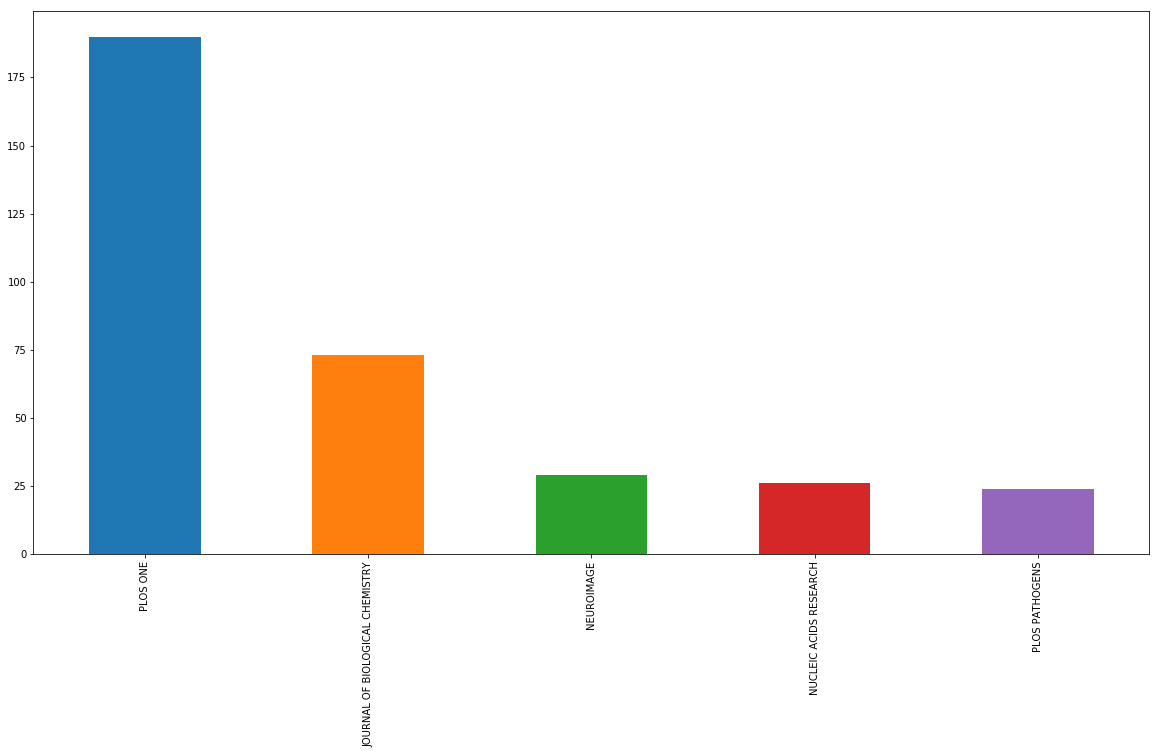

In [574]:
#the five most common journals
apc_data['journal_title'].value_counts(sort=True).head().plot(kind='bar');


## Calculate the mean, median, and standard deviation of the open-access cost per article for each journal

### The mean, median and standard deviation per article for Plos_One Journal

In [584]:
article_plos_one = apc_data[apc_data.journal_title=='PLOS ONE']

In [587]:
print(article_plos_one.cost.mean())
print(article_plos_one.cost.median())
print(article_plos_one.cost.std())

38751.29136842105
898.475
189009.51197380977


### The mean, median and standard deviation per article for Journal Of Biological Chemistry

In [588]:
article_jbc = apc_data[apc_data.journal_title=='JOURNAL OF BIOLOGICAL CHEMISTRY']

In [589]:
print(article_jbc.cost.mean())
print(article_jbc.cost.median())
print(article_jbc.cost.std())

28737.616027397256
1314.53
164141.46695187537


### The mean, median and standard deviation per article for Journal Of Neuro Image

In [592]:
article_neuro = apc_data[apc_data.journal_title=='NEUROIMAGE']

In [593]:
print(article_neuro.cost.mean())
print(article_neuro.cost.median())
print(article_neuro.cost.std())

2215.168275862069
2326.43
266.65394691928987


### The mean, median and standard deviation per article for Journal Of Nucleic acids Research

In [595]:
article_nucleic = apc_data[apc_data.journal_title=='NUCLEIC ACIDS RESEARCH']

In [596]:
print(article_nucleic.cost.mean())
print(article_nucleic.cost.median())
print(article_nucleic.cost.std())

1149.0
852.0
442.9404474644419


### The mean, median and standard deviation per article for Journal Of Nucleic acids Research

In [563]:
apc_data.describe()

,cost
count,2127.000000
mean,24067.339972
std,146860.665559
min,0.000000
25%,1280.000000
50%,1884.010000
75%,2321.305000
max,999999.000000
